# Modeling and Simulation in Python

Chapter 4: Predict

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


### Analysis with SymPy

In [1]:
from sympy import *

The following line sets up Jupyter notebook to display math.

In [2]:
init_printing() 

And this function provides the option of showing results in LaTeX format.

In [3]:
from sympy.printing import latex

def show(expr, show_latex=False):
    if show_latex:
        print(latex(expr))
    return expr

Create a symbol for time.

In [4]:
t = symbols('t')
show(t)

If you combine symbols and numbers, you get symbolic expressions.

In [5]:
expr = t + 1
show(expr)

The result is an Add object, which just represents the sum without trying to compute it.

In [6]:
type(expr)

sympy.core.add.Add

`subs` can be used to replace a symbol with a number, which allows the addition to proceed.

In [7]:
expr.subs(t, 2)

`f` is a special class of symbol that represents a function.

In [8]:
f = Function('f')
show(f)

f

The type of `f` is `UndefinedFunction`

In [9]:
type(f)

sympy.core.function.UndefinedFunction

Now SymPy understands that `f(t)` means `f` evaluated at `t`, but it doesn't try to evaluate it yet.

In [10]:
f(t)

`diff` returns a `Derivative` object that represents the time derivative of `f`

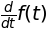

In [11]:
dfdt = diff(f(t), t)
show(dfdt)

In [12]:
type(dfdt)

sympy.core.function.Derivative

We need a symbol for `alpha`

In [13]:
alpha = symbols('alpha')
show(alpha)

Now we can write the differential equation for proportional growth.

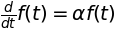

In [14]:
eq1 = Eq(dfdt, alpha*f(t))
show(eq1)

And use `dsolve` to solve it.  The result is the general solution.

In [15]:
solution_eq = dsolve(eq1)
show(solution_eq)

In this case, finding the particular solution is easy: we just replace `C1` with `p0`

In [16]:
C1, p0 = symbols('C1 p0')

In [17]:
particular = solution_eq.subs(C1, p0)
show(particular)

In the next example, we'll have to work a little harder to find the particular solution.

In [18]:
from sympy import *
from sympy.printing import latex
def show(expr, show_latex = False):
    if show_latex:
        print(latex(expr))
    return expr

a = symbols('a')
expr = a + 2
show(expr)
expr.subs(a, 3)

f = symbols('f')
f(t)
dfdt = diff(f(t),t)
dfdt
beta = symbols('b')
equa1 = Eq(dfdt, beta*f(t))
solved = dsolve(equa1)
C1, p0 = symbols('C1 p2')
particular = solved.subs(C1, p0)
particular

### Solving the quadratic growth equation 

We'll use the (r, K) parameterization, so we'll need two more symbols:

In [19]:
r, K = symbols('r K')

Now we can write the differential equation.

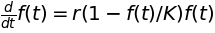

In [20]:
eq2 = Eq(diff(f(t), t), r*f(t) * (1 - f(t)/K))
show(eq2)

And solve it.

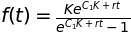

In [21]:
solution_eq = dsolve(eq2)
show(solution_eq)

`rhs` selects the right-hand side of the solution.

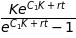

In [22]:
general = solution_eq.rhs
show(general)

We can evaluate the right-hand side at $t=0$

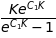

In [23]:
at0 = general.subs(t, 0)
show(at0)

Now we want to find the value of `C1` that makes `f(0) = p0`.

So we'll create the equation `at0 = p0` and solve for `C1`.  Because this is just an algebraic identity, not a differential equation, we use `solve`, not `dsolve`.

The result from `solve` is a sequence of solutions.  In this case, [we have reason to expect only one solution](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem), but we still get a sequence, so we have to use the bracket operator, `[0]`, to select the first one.

In [24]:
solutions = solve(Eq(at0, p0), C1)
type(solutions), len(solutions)

(list, 1)

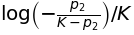

In [25]:
value_of_C1 = solutions[0]
show(value_of_C1)

Now in the general solution, we want to replace `C1` with the value of `C1` we just figured out.

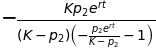

In [26]:
particular = general.subs(C1, value_of_C1)
particular

The result is complicated, but SymPy provides a method that tries to simplify it.

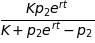

In [27]:
particular = simplify(particular)
show(particular)

Often simplicity is in the eye of the beholder, but that's about as simple as this expression gets.

Just to double-check, we can evaluate it at `t=0` and confirm that we get `p0`

In [28]:
particular.subs(t, 0)

[In some places](https://en.wikipedia.org/wiki/Population_growth#Logistic_equation) you'll see this solution, which is called the "logistic function" written in a different form:

$f(t) = \frac{K}{1 + A e^{-rt}}$

where $A = (K - p_0) / p_0$.

We can use SymPy to confirm that these two forms are equivalent.  First we represent the alternative version of the logistic function:

In [29]:
A = (K - p0) / p0
show(A)

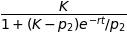

In [30]:
logistic = K / (1 + A * exp(-r*t))
show(logistic)

To see whether two expressions are equivalent, we can check whether their difference simplifies to 0.

In [31]:
simplify(particular - logistic)

This test only works one way: if SymPy says the difference reduces to 0, the expressions are definitely equivalent (and not just numerically close).

But if SymPy can't find a way to simplify the result to 0, that doesn't necessarily mean there isn't one.  Testing whether two expressions is a surprisingly hard problem; in fact, there is no algorithm that can solve it in general.

In [32]:
r, k, p1 = symbols('r k p1')
eq2 = Eq(dfdt, r*f(t)*(1-f(t)/k))
solution = dsolve(eq2)
a0 = solution.rhs
solution01 = solution.subs(t, 0)
a0 = solution01.rhs
a0
p0 = symbols('p0')
solution_C = solve(Eq(a0, p1), C1)

solution02 = solution.subs(C1, solution_C[0])
solution02 = simplify(solution02)
show(solution02)
solution02.subs(t, 0)

A = (k - p1)/p1
logistic = k / (1 + A * exp(-r*t))
simplify(logistic - solution02.rhs)

**Exercise:** Solve the quadratic growth equation using the alternative parameterization

$\frac{df(t)}{dt} = \alpha f(t) + \beta f^2(t) $

In [33]:
# Solution
alpha, beta = symbols('alpha beta')

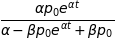

In [34]:
eq3 = Eq(dfdt,alpha*f(t)+beta*f(t)**2)
solution_eq3 = dsolve(eq3)
general = solution_eq3.rhs
at0 = general.subs(t, 0)
par_equa = Eq(at0, p0)
value_C1 = solve(par_equa, C1)
particular = general.subs(C1, value_C1[0])
particular.simplify()

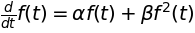

In [35]:
# Solution
eq3 = Eq(diff(f(t), t), alpha*f(t) + beta*f(t)**2)
eq3

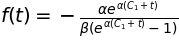

In [36]:
# Solution

solution_eq = dsolve(eq3)
solution_eq

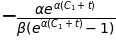

In [37]:
# Solution

general = solution_eq.rhs
general

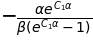

In [38]:
# Solution

at0 = general.subs(t, 0)
at0

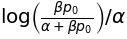

In [39]:
# Solution

solutions = solve(Eq(at0, p0), C1)
value_of_C1 = solutions[0]
value_of_C1

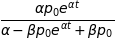

In [40]:
# Solution

particular = general.subs(C1, value_of_C1)
particular.simplify()
#particular

**Exercise:**  Use [WolframAlpha](https://www.wolframalpha.com/) to solve the quadratic growth model, using either or both forms of parameterization:

    df(t) / dt = alpha f(t) + beta f(t)^2

or

    df(t) / dt = alpha f(t) (1 - f(t)/K)

Find the general solution and also the particular solution where `f(0) = p0`.

In [42]:
r = symbols('r')
eq4 = Eq((20/501), (2500 - 5000*120/(240+r)))
solve(eq4, r)